In [1]:
from numpy import reshape
import seaborn as sns
import pandas as pd  
import torch
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import soundfile as sf
import numpy as np
from IPython.display import display, Audio
import librosa
def ms2samples(time, rate):
    return int((time/1000)*rate)

def samples2ms(sample,rate):
    return int((sample/rate)*1000)
    
def graph_n_play(y,sr):
    plt.figure(figsize=(14, 5))
    librosa.display.waveplot(y, sr=sr)
    plt.show()
    ipd.display(ipd.Audio(y,rate = sr))
def linear_n_play(audio_path):
    # y, sr = sf.read(audio_path)
    y, sr = librosa.load(audio_path, sr=None)
    fig, ax = plt.subplots()
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                                   sr=sr, ax=ax)
    ax.set(title='Linear-frequency power spectrogram')
    ax.label_outer()
    display(Audio(y,rate=sr))
    plt.show()

In [2]:
la = pd.read_csv("docs/T3/dev_protocol.txt", sep=' ', header=None)
la.columns = ["utt","set", "class"]
la.head

<bound method NDFrame.head of                             utt  set  class
0     ADD2023_T3_D_00000000.wav  dev      5
1     ADD2023_T3_D_00000001.wav  dev      2
2     ADD2023_T3_D_00000002.wav  dev      0
3     ADD2023_T3_D_00000003.wav  dev      3
4     ADD2023_T3_D_00000004.wav  dev      1
...                         ...  ...    ...
8395  ADD2023_T3_D_00008395.wav  dev      2
8396  ADD2023_T3_D_00008396.wav  dev      6
8397  ADD2023_T3_D_00008397.wav  dev      2
8398  ADD2023_T3_D_00008398.wav  dev      6
8399  ADD2023_T3_D_00008399.wav  dev      2

[8400 rows x 3 columns]>

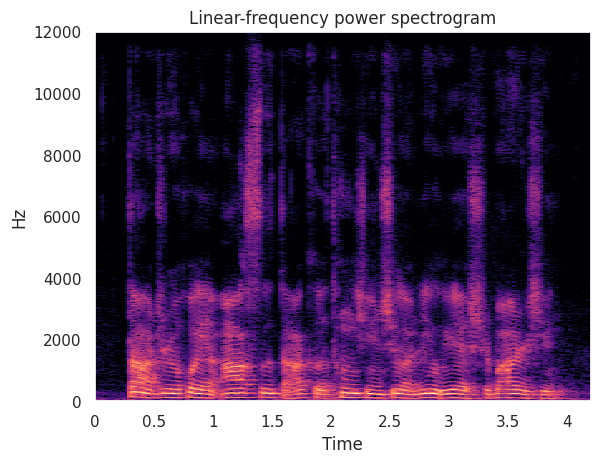

In [50]:
# Some files have formating error:
# '/dataa/Dataset/ADD2023/Track3/train/wav/ADD2023_T3_T_00006579.wav': Format not recognised.
# '/dataa/Dataset/ADD2023/Track3/train/wav/ADD2023_T3_T_00022338.wav': Format not recognised.
# '/dataa/Dataset/ADD2023/Track3/train/wav/ADD2023_T3_T_00004788.wav': Format not recognised.
# all above files belong to class 2

linear_n_play("/dataa/Dataset/ADD2023/Track3/train/wav/ADD2023_T3_T_00000009.wav")

In [3]:
from soundfile import SoundFile
fd = SoundFile("/dataa/Dataset/ADD2023/Track3/train/wav/ADD2023_T3_T_00000009.wav")
fd

SoundFile('/dataa/Dataset/ADD2023/Track3/train/wav/ADD2023_T3_T_00000009.wav', mode='r', samplerate=24000, channels=1, format='WAV', subtype='PCM_16', endian='FILE')

## Get audio file formating infor

In [98]:
# create protocol file
mypath = "/dataa/Dataset/ADD2023/Track3/test/wav/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
with open("docs/T3/T3_R1_test_protocol.txt", "w") as f:
    for i in onlyfiles:
        f.write("wav/{} test -1\n".format(i))

In [106]:
from soundfile import SoundFile
df = pd.DataFrame()
# feat.columns = ["utt", "feats"]
mypath = "/dataa/Dataset/ADD2023/Track3/test/"
# for f in tqdm(onlyfiles):
data = []
with open("docs/T3/T3_R1_test_protocol.txt", "r") as f:
    data = f.readlines()
for f in tqdm(data):
    # print(f)
    utt, _,label = f.split(" ")
    wav = join(mypath, utt)
    fd = SoundFile(wav)
    
    df = df.append({"utt": utt, "class": int(label.strip()), "samplerate": fd.samplerate, "channels": fd.channels, "subtype": fd.subtype}, ignore_index=True)
    # print(bio_inp)
df.head
df=df.astype({'class': 'int32'})
df=df.astype({'samplerate': 'int32'})
df=df.astype({'channels': 'int32'})

100%|██████████| 79490/79490 [08:51<00:00, 149.47it/s] 


In [110]:
df.loc[(df["samplerate"]!=16000) & ((df["samplerate"]!=24000)) & (df["samplerate"]!=44100)]

,utt,class,samplerate,channels,subtype


In [111]:
df.to_csv("docs/T3/test_metadata.txt", index=False)

/dataa/Dataset/ADD2023/Track3/dev/wav/ADD2023_T3_D_00002924.wav


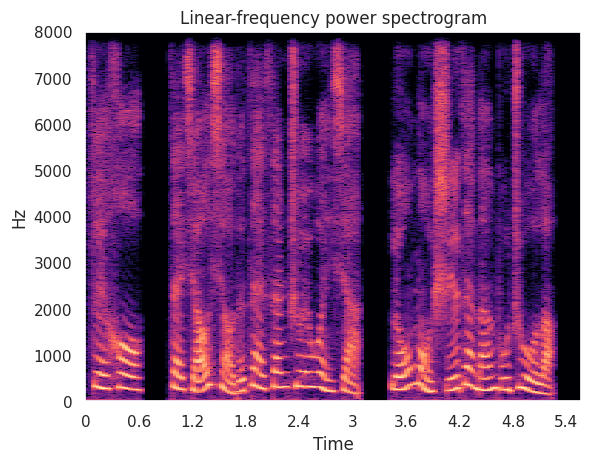

In [37]:
real_file = la.loc[la['class'] == 1].sample().values[0][0]
dev_path = "/dataa/Dataset/ADD2023/Track3/dev/wav/"
print(dev_path+real_file)
linear_n_play(dev_path+real_file)

In [8]:
np.unique(df["subtype"])

array(['PCM_16'], dtype=object)

# LFCC feature

In [3]:
import numpy as np
import os
from lfcc import lfcc
import soundfile as sf
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import seaborn as sns
import pandas as pd  

In [4]:
mypath = "./feats/t3_mchad_195/wav/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]


In [5]:
df = pd.DataFrame()
# feat.columns = ["utt", "feats"]

# for f in tqdm(onlyfiles):
for f in tqdm(onlyfiles):
    # print(f)
    if "_T_" in f:
        continue
    # feat = np.load(join(mypath, f)).flatten()
    feat = np.array(torch.load(join(mypath, f)))
    df = df.append({"utt": f.replace(".npy",".wav"), "feats": feat}, ignore_index=True)
    # print(bio_inp)
df.head

100%|██████████| 30797/30797 [00:11<00:00, 2630.56it/s]


<bound method NDFrame.head of                             utt  \
0     ADD2023_T3_D_00007916.wav   
1     ADD2023_T3_D_00006708.wav   
2     ADD2023_T3_D_00000407.wav   
3     ADD2023_T3_D_00001731.wav   
4     ADD2023_T3_D_00006374.wav   
...                         ...   
8395  ADD2023_T3_D_00006744.wav   
8396  ADD2023_T3_D_00000330.wav   
8397  ADD2023_T3_D_00001343.wav   
8398  ADD2023_T3_D_00005076.wav   
8399  ADD2023_T3_D_00001164.wav   

                                                  feats  
0     [-0.35040608048439026, -1.248529076576233, 0.8...  
1     [-0.36077699065208435, -0.36163243651390076, -...  
2     [-0.7081642746925354, -1.057443618774414, -0.4...  
3     [0.788706362247467, -0.20726211369037628, 1.19...  
4     [-0.36967045068740845, -1.2420300245285034, 0....  
...                                                 ...  
8395  [-0.7027842998504639, -1.0632827281951904, -0....  
8396  [0.795905351638794, 0.37680697441101074, -0.75...  
8397  [0.33820176124572754,

In [6]:
full = la.join(df.set_index('utt'), on="utt", how="inner")
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8400 entries, 0 to 8399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   utt     8400 non-null   object
 1   set     8400 non-null   object
 2   class   8400 non-null   int64 
 3   feats   8400 non-null   object
dtypes: int64(1), object(3)
memory usage: 328.1+ KB


In [7]:
# np.array(full.sample().feats)[0].shape
full.sample().feats.values[0].shape

(8,)

# Clustering

In [8]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn import cluster

import numpy as np
import pandas as pd
import requests
import zipfile

import os
from PIL import Image
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns

import hdbscan
import umap
from sklearn.neighbors import KNeighborsTransformer
import pynndescent

import networkx as nx
import cdlib.algorithms as cd

sns.set()

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer', 'graph_tool', 'karateclub', 'leidenalg'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'ASLPAw', 'karateclub'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'infomap', 'wurlitzer', 'leidenalg'}


In [9]:
X=np.array(full["feats"].to_list())
X.shape

(8400, 8)

In [124]:
%%time
km_labels = cluster.KMeans(n_clusters=7).fit_predict(X)
cl_labels = cluster.AgglomerativeClustering(n_clusters=7, linkage="complete").fit_predict(X)
# sl_labels = cluster.AgglomerativeClustering(n_clusters=111, linkage="single").fit_predict(X)
db_labels = cluster.DBSCAN(eps=0.00001).fit_predict(X)
hd_labels = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=100, cluster_selection_epsilon=0.00001).fit_predict(X)

CPU times: user 7min 41s, sys: 4min 41s, total: 12min 22s
Wall time: 6min 6s


In [79]:
from sklearn import decomposition
print("calculating pca")
pca = decomposition.PCA(n_components=2)
pca.fit(X)
z = pca.transform(X)

calculating pca


In [10]:
import umap
from sklearn.preprocessing import StandardScaler
reducer = umap.UMAP()

z = reducer.fit_transform(X)
print("calculating pca")


calculating pca


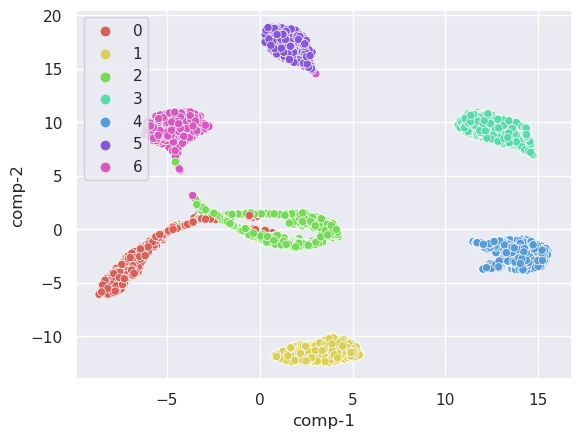

In [11]:
dff = pd.DataFrame()
uniq = np.unique(full['class']).shape[0]
uniq
dff["y"] = full['class']
dff["comp-1"] = z[:,0]
dff["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=dff.y.tolist(),
                palette=sns.color_palette("hls", uniq),
                
                data=dff).set(title="") 
plt.savefig('docs/T3/umap_195_{}.png'.format("mchad_25"),dpi=600)

In [12]:
# test embedding without labels
mypath = "./feats/t3_mchad_195/wav/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [13]:
df = pd.DataFrame()
# feat.columns = ["utt", "feats"]

# for f in tqdm(onlyfiles):
for f in tqdm(onlyfiles):
    # print(f)
    if "_T_" in f:
        continue
    if "_D_" in f:
        continue
    # feat = np.load(join(mypath, f)).flatten()
    feat = np.array(torch.load(join(mypath, f)))
    df = df.append({"utt": f.replace(".npy",".wav"), "feats": feat}, ignore_index=True)
    # print(bio_inp)
df.head

100%|██████████| 110287/110287 [03:10<00:00, 579.13it/s]


<bound method NDFrame.head of                              utt  \
0      ADD2023_T3_E_00034912.wav   
1      ADD2023_T3_E_00011219.wav   
2      ADD2023_T3_E_00076298.wav   
3      ADD2023_T3_E_00042018.wav   
4      ADD2023_T3_E_00081621.wav   
...                          ...   
79485  ADD2023_T3_E_00065208.wav   
79486  ADD2023_T3_E_00045919.wav   
79487  ADD2023_T3_E_00061404.wav   
79488  ADD2023_T3_E_00001418.wav   
79489  ADD2023_T3_E_00047980.wav   

                                                   feats  
0      [-0.3648650348186493, -1.250289797782898, 0.87...  
1      [0.7748587727546692, -0.20845943689346313, 1.1...  
2      [0.5494300723075867, 1.208316683769226, 0.1763...  
3      [0.7542012333869934, -0.16838255524635315, 1.1...  
4      [-0.5747289657592773, 0.02431744523346424, -1....  
...                                                  ...  
79485  [0.7636796236038208, 0.03560401499271393, 1.00...  
79486  [0.8426312804222107, 0.4356705844402313, -0.84...  
79487 

In [55]:
score_file = "docs/T3/fix_mchad_rawnet_fs_ori_t3r1test_195_emp.txt"
df_score = pd.read_csv(score_file, sep=' ', header=None)
df_score.columns = ["utt", "class"]
df_score.head

<bound method NDFrame.head of                              utt  class
0      ADD2023_T3_E_00062021.wav      1
1      ADD2023_T3_E_00074944.wav      6
2      ADD2023_T3_E_00076444.wav      4
3      ADD2023_T3_E_00080375.wav      2
4      ADD2023_T3_E_00020121.wav      0
...                          ...    ...
79485  ADD2023_T3_E_00038898.wav      0
79486  ADD2023_T3_E_00022743.wav      1
79487  ADD2023_T3_E_00075379.wav      5
79488  ADD2023_T3_E_00071191.wav      6
79489  ADD2023_T3_E_00006675.wav      0

[79490 rows x 2 columns]>

In [56]:
full = df_score.join(df.set_index('utt'), on="utt", how="inner")
X=np.array(full["feats"].to_list())
X.shape

(79490, 8)

In [37]:
import umap
from sklearn.preprocessing import StandardScaler
reducer = umap.UMAP()

z = reducer.fit_transform(X)
print("calculating umap")

calculating umap


In [35]:
from sklearn import decomposition
print("calculating pca")
pca = decomposition.PCA(n_components=2)
pca.fit(X)
z = pca.transform(X)

calculating pca


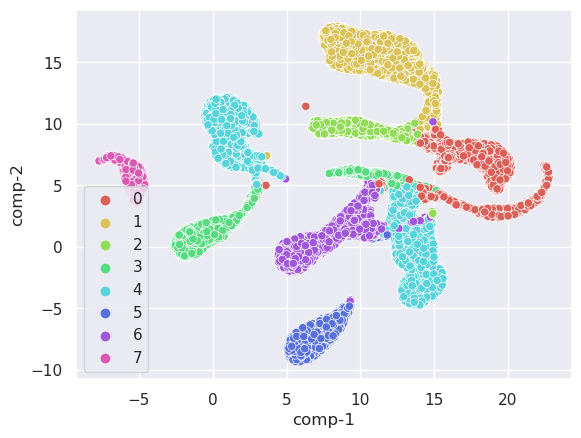

In [38]:
dff = pd.DataFrame()
uniq = np.unique(full['class']).shape[0]
uniq
dff["y"] = full['class']
dff["comp-1"] = z[:,0]
dff["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=dff.y.tolist(),
                palette=sns.color_palette("hls", uniq),
                
                data=dff).set(title="") 
plt.savefig('docs/T3/umap_fix_predict_195.png',dpi=600)

                             utt  class  \
37216  ADD2023_T3_E_00015971.wav      7   

                                                   feats  
37216  [0.811062753200531, -0.15795713663101196, 1.16...  


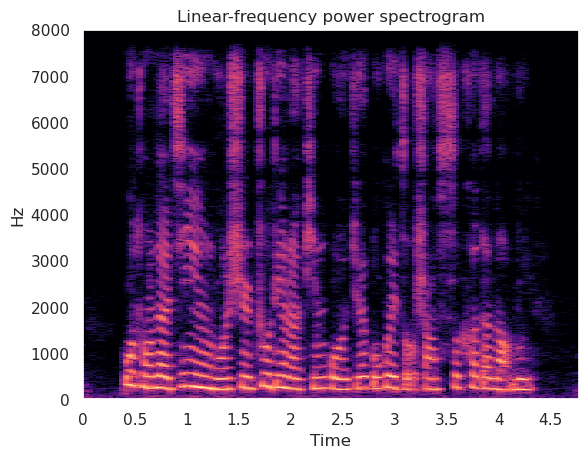

In [58]:
# listen to each class
sample = full.loc[full['class'] == 7].sample()
print(sample)
linear_n_play(os.path.join("/dataa/Dataset/ADD2023/Track3/test/enhanced/",sample.values[0][0]))

# Fixing test output

In [59]:
meta = pd.read_csv("docs/T3/test_metadata.txt")
meta=meta.drop(columns=["class"])
meta.head

<bound method NDFrame.head of                              utt  samplerate  channels subtype
0      ADD2023_T3_E_00062021.wav       16000         1  PCM_16
1      ADD2023_T3_E_00074944.wav       16000         1  PCM_16
2      ADD2023_T3_E_00076444.wav       24000         1  PCM_16
3      ADD2023_T3_E_00080375.wav       16000         1  PCM_16
4      ADD2023_T3_E_00020121.wav       16000         1  PCM_16
...                          ...         ...       ...     ...
79485  ADD2023_T3_E_00038898.wav       16000         1  PCM_16
79486  ADD2023_T3_E_00022743.wav       16000         1  PCM_16
79487  ADD2023_T3_E_00075379.wav       16000         1  PCM_16
79488  ADD2023_T3_E_00071191.wav       16000         1  PCM_16
79489  ADD2023_T3_E_00006675.wav       16000         1  PCM_16

[79490 rows x 4 columns]>

In [60]:
score_file = "./docs/T3/fix_mchad_rawnet_fs_enhanced_t3r1test_195_emp.txt"
df_score = pd.read_csv(score_file, sep=' ', header=None)
df_score.columns = ["utt", "class"]
df_score.head

<bound method NDFrame.head of                              utt  class
0      ADD2023_T3_E_00062021.wav      1
1      ADD2023_T3_E_00074944.wav      6
2      ADD2023_T3_E_00076444.wav      0
3      ADD2023_T3_E_00080375.wav      3
4      ADD2023_T3_E_00020121.wav      0
...                          ...    ...
79485  ADD2023_T3_E_00038898.wav      1
79486  ADD2023_T3_E_00022743.wav      1
79487  ADD2023_T3_E_00075379.wav      5
79488  ADD2023_T3_E_00071191.wav      6
79489  ADD2023_T3_E_00006675.wav      0

[79490 rows x 2 columns]>

In [61]:
full = meta.join(df_score.set_index('utt'), on="utt", how="inner")

In [44]:
full["final"] = np.where(full["samplerate"]==44100,7, full['class'])
full.loc[full["final"]==7]

,utt,samplerate,channels,subtype,class,final
7,ADD2023_T3_E_00040232.wav,44100,1,PCM_16,6,7
35,ADD2023_T3_E_00068521.wav,44100,1,PCM_16,6,7
67,ADD2023_T3_E_00001920.wav,44100,1,PCM_16,6,7
134,ADD2023_T3_E_00000313.wav,44100,1,PCM_16,1,7
154,ADD2023_T3_E_00006425.wav,44100,1,PCM_16,2,7
...,...,...,...,...,...,...
79413,ADD2023_T3_E_00033734.wav,44100,1,PCM_16,3,7
79430,ADD2023_T3_E_00075141.wav,44100,1,PCM_16,6,7
79437,ADD2023_T3_E_00048486.wav,44100,1,PCM_16,6,7
79442,ADD2023_T3_E_00054246.wav,44100,1,PCM_16,6,7


In [63]:
full.loc[(full["samplerate"]==24000) & (full["class"]!=4)]

,utt,samplerate,channels,subtype,class
2,ADD2023_T3_E_00076444.wav,24000,1,PCM_16,0
6,ADD2023_T3_E_00072701.wav,24000,1,PCM_16,3
28,ADD2023_T3_E_00043218.wav,24000,1,PCM_16,3
34,ADD2023_T3_E_00072789.wav,24000,1,PCM_16,6
36,ADD2023_T3_E_00074393.wav,24000,1,PCM_16,6
...,...,...,...,...,...
79440,ADD2023_T3_E_00071754.wav,24000,1,PCM_16,6
79445,ADD2023_T3_E_00018334.wav,24000,1,PCM_16,3
79456,ADD2023_T3_E_00049584.wav,24000,1,PCM_16,3
79457,ADD2023_T3_E_00074251.wav,24000,1,PCM_16,6


In [46]:
final_score=full.drop(columns=["samplerate","channels","subtype","class"])
final_score.to_csv("docs/T3/fix_mchad_rawnet_fs_enhanced_t3r1test_195_emp.txt", sep=" ", index=False, header=None)